# __Project Motivation:__

**For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. This project uses BlueOrRed.csv which contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. For this dataset, I will use the Undecided variable as my output variable and the rest of the variables as my input variables. I want to predict whether a candidate is undecided(Undecided=1) or decided(Undecided=0).**

In [5]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, zero_one_loss, f1_score, classification_report, recall_score, confusion_matrix, precision_score, RocCurveDisplay 

In [2]:
# loading in data from csv
voters = pd.read_csv('BlueOrRed.csv')

# checking for missing data
missing = voters.isnull()
missing

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False


In [3]:
# dropping cases that have missing data
dropped = voters.dropna()
dropped

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1
...,...,...,...,...,...,...,...,...,...
9995,55,1,1,1,2,37.0,18,0,1
9996,29,1,1,0,5,100.0,15,1,1
9997,59,0,1,0,1,35.0,20,0,1
9998,66,0,0,1,3,4.0,8,1,0


**Normalizing the continuous variables using min-max normalization. Here, I obtain a new dataset that has my normalized continuous input variables, the categorical input variables (the categorical input variables are fine and don’t need to be normalized), and my output variable.**

In [4]:
# normalizing continuous variables using min-max normalization
numerical = voters.select_dtypes(include = 'number').columns

min_vals = voters[numerical].min()
max_vals = voters[numerical].max()

voters[numerical] = (voters[numerical] - min_vals) / (max_vals - min_vals)
voters[numerical]

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1.0,1.0,1.0,0.500000,0.306422,0.583333,0.0,1.0
1,0.444444,1.0,1.0,1.0,0.833333,0.763303,0.583333,1.0,0.0
2,0.587302,1.0,0.0,1.0,0.833333,0.234862,0.666667,0.0,1.0
3,0.507937,1.0,0.0,1.0,0.500000,0.025688,0.000000,0.0,0.0
4,0.492063,1.0,1.0,1.0,0.166667,0.113761,0.583333,1.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,0.587302,1.0,1.0,1.0,0.166667,0.060550,0.833333,0.0,1.0
9996,0.174603,1.0,1.0,0.0,0.666667,0.176147,0.583333,1.0,1.0
9997,0.650794,0.0,1.0,0.0,0.000000,0.056881,1.000000,0.0,1.0
9998,0.761905,0.0,0.0,1.0,0.333333,0.000000,0.000000,1.0,0.0


**Using the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. My test set should is 30% of the entire data. I then print the shape of the X_train, y_train, X_test and y_test data. I use the default value of the random state in splitting the data, which is random_state=42.**

In [6]:
X = voters[numerical].drop('Undecided', axis = 1)
y = voters[numerical]['Undecided']

# training and splitting the data (30%/70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#printing the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7000, 8)
Shape of y_train: (7000,)
Shape of X_test: (3000, 8)
Shape of y_test: (3000,)


**Here, I construct a decision tree and fit the tree into the data. Then, I use my decision tree model to make predictions on the training set as well as on the test set. Finally, I assign my results to y_train_pred and y_test_pred respectively. The first 100 predicitons  for each of the y_train_pred and y_test_pred are printed out.** 


In [7]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

# making predictions on test set
y_test_pred = decision_tree.predict(X_test)
y_train_pred = decision_tree.predict(X_train)

#printing out first 100 preds for y_train
print(y_train_pred[:100])

#printing out first 100 preds for y_test
print(y_test[:100])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1.]
6252    0.0
4684    1.0
1731    1.0
4742    1.0
4521    1.0
       ... 
3787    0.0
9189    0.0
7825    1.0
7539    1.0
7231    0.0
Name: Undecided, Length: 100, dtype: float64


In [44]:
# overall accuracy on the training set
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 1.0


In [45]:
# overall accuracy on the test set
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9696666666666667


**I am using the .score() method of the tree estimator to find the overall accuracy on the training set and test set.**

In [8]:
# using .score() method on the training set
train_accuracy_score = decision_tree.score(X_train, y_train)
print("Train Accuracy using .score method:", train_accuracy_score)

# using .score() method on the test set
test_accuracy_score = decision_tree.score(X_test, y_test)
print("Test Accuracy using .score method:", test_accuracy_score)

Train Accuracy using .score method: 1.0
Test Accuracy using .score method: 0.967


**I am using the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set.**

In [9]:
# using zero_one_loss() method on the training set
training_error = zero_one_loss(y_train, y_train_pred)
print("Prediction Error of training set is:", training_error)

# using zero_one_loss() method on test set
test_error = zero_one_loss(y_test, y_test_pred)
print("Prediction Error on test set is:", test_error)

Prediction Error of training set is: 0.0
Prediction Error on test set is: 0.03300000000000003


**Generating the classification report using the classification_report().** 

In [50]:
c_report = classification_report(y_test, y_test_pred)
print(c_report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1814
         1.0       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



**Generating the confusion matrix using confusion_matrix().**

In [51]:
c_matrix = confusion_matrix(y_test, y_test_pred)
print(c_matrix)

[[1764   50]
 [  41 1145]]


**Generating the precision score using precision_score().**

In [52]:
p_score = precision_score(y_test, y_test_pred)
print(p_score)

0.9581589958158996


**Generating the recall score using recall_score().**

In [53]:
r_score = recall_score(y_test, y_test_pred)
print(r_score)

0.9654300168634065


**Generating the f1 score using f1_score().**

In [54]:
f1 = f1_score(y_test, y_test_pred)
print(f1)

0.9617807643847123


**Generating a roc curve using plot_roc_curve().** 

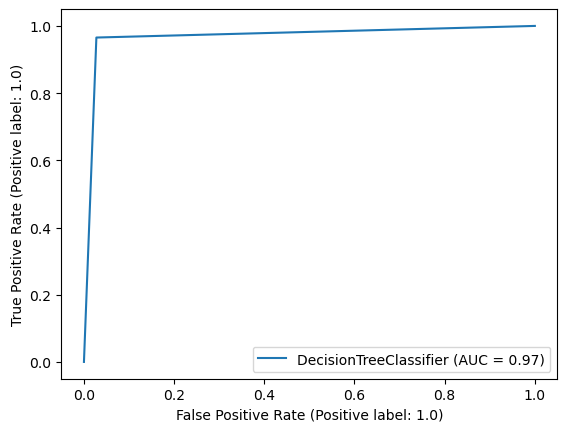

In [57]:
# plot_roc_curve() is outdated, used RocCurveDisplay instead
roc_display = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)

**Here, I plot the confusion matrix using Seaborn.**

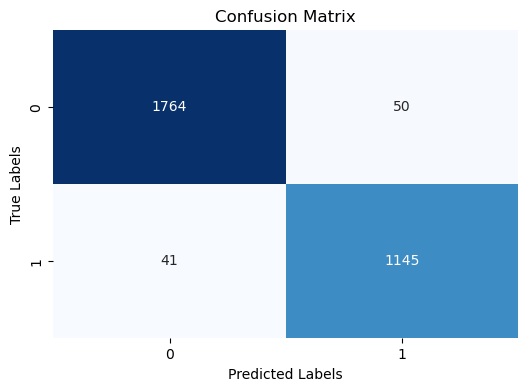

In [65]:
# plot_confusion_matrix is outdated, using seaborn instead
plt.figure(figsize = (6, 4))
sns.heatmap(c_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**I retrieve the maximum depth of this decision tree while using clf.tree_.max_depth where clf is the name of my estimator, and tree is the module in sklearn.** 

In [66]:
max_depth = decision_tree.tree_.max_depth

print("Max Depth of the Decision Tree:", max_depth)

Max Depth of the Decision Tree: 18


__1. I find the optimal depth of the tree by tuning the max_depth hyperparameter.__

__2. I write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree.__

**_I needed to initialize a variable outside the loop to track the error rates for each maximum depth value._**


In [79]:
error_rates = []

# iterating over each max_depth value from 1 to the maximum depth of the tree
for i in range(1, decision_tree.tree_.max_depth + 1):
    
    # creating a DT for the max_depth
    dtree = DecisionTreeClassifier(max_depth=i)

    # training the model on the training data
    dtree.fit(X_train, y_train)

    # test set prediction
    y_depth_pred = dtree.predict(X_test)

    # calculating the error rate and store it in the error_rates list
    error_rate = 1 - accuracy_score(y_test, y_depth_pred)
    error_rates.append(error_rate)

# finding optimal max_depth with the minimum error rate
optimal_max_depth = np.argmin(error_rates) + 1

print("Error rates for each max_depth value:", error_rates)
print("Optimal max_depth:", optimal_max_depth)

Error rates for each max_depth value: [0.31799999999999995]
Optimal max_depth: 1


__3. I plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis. Also, I use np.argmin() on the error rates I obtained to retrieve the optimal maximum depth of the tree with the least error rate.__

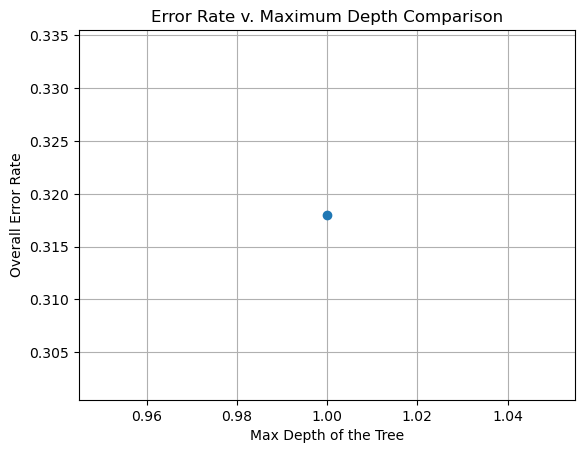

Error rates for each max_depth value: [0.31799999999999995]
Optimal max_depth (with least error rate): 1


In [84]:
plt.plot(range(1, decision_tree.tree_.max_depth + 1), error_rates, marker = 'o')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('Overall Error Rate')
plt.title('Error Rate v. Maximum Depth Comparison')
plt.grid(True)
plt.show()

print("Error rates for each max_depth value:", error_rates)
print("Optimal max_depth (with least error rate):", optimal_max_depth)

**I find the optimal maximum depth of the decision tree model using grid search cross validation. Additionally, I optimizied the max_features hyperparameter as well. I used the GridSearchCV() constructor inside the sklearn.model_selection module. The parameter is set to cv=8.**

In [10]:
param_grid = {"max_depth":range(1,18), 
"max_features":[0.2, 0.4, 0.6, 0.8]}

decision_tree = DecisionTreeClassifier()
gridsearch_decision_tree = GridSearchCV(decision_tree, param_grid, cv = 8)
gridsearch_decision_tree.fit(X_train, y_train)

gridsearch_decision_tree.best_params_

{'max_depth': 6, 'max_features': 0.8}

**The maximum depth hyperparameter was tuned again using cross validation but this time, I used the cross_val_score() function inside the sklearn.model_selection module. The cross_val_score() function in combination with a for loop was used to find the optimal maximum depth of the tree.**

**The error rate for each depth was tracked, and plotted _(error rates versus the corresponding maximum depths of the tree)_. Also, the np.argmin() was used on the error rates to retrieve the optimal maximum depth, corresponding to the lowest error rate.**

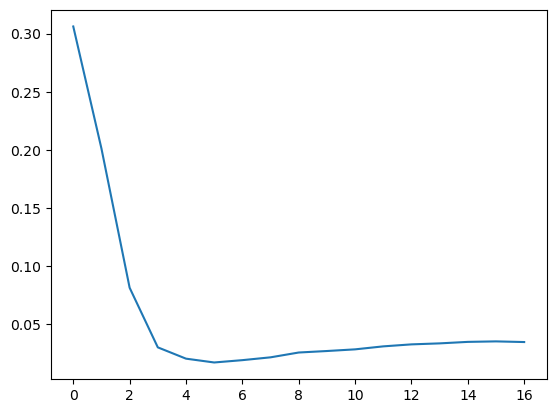

In [110]:
scores = []
for i in range(1,18):
    dtree1 = DecisionTreeClassifier(max_depth = i)
    dtree1.fit(X_train, y_train)
    scores.append(1 - np.mean(cross_val_score(dtree1, X_train, y_train, scoring 
                                              = "accuracy", cv = 8)))
    
np.argmin(scores)
plt.plot(scores)

**I useed another approach to plot the error rates versus the maximum depth of the tree. Here, I used the validation_curve() function inside the sklearn.model_selection module. This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. I aggregated the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value. Then, I used these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets, and plotted the error rates on the training set versus the maximum depth values. Finally, I plotted on the same figure, the error rates of the test (or validation) set versus the maximum depth values.**

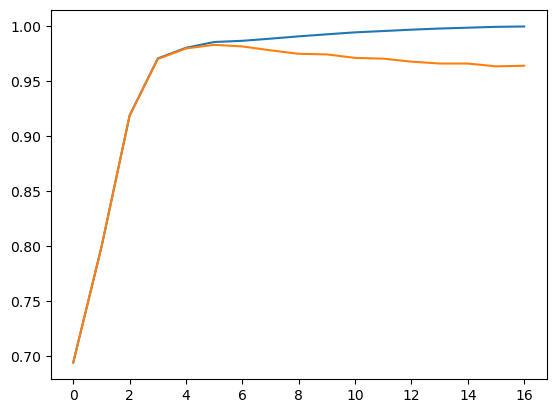

In [109]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train, y_train)
scores = validation_curve(dtree2, X_train, y_train, param_name = "max_depth", param_range 
                          = range(1,18), scoring = "accuracy", cv = 8)
train_scores = np.mean(scores[0], axis = 1)
validation_scores = np.mean(scores[1], axis = 1)

plt.plot(train_scores)
plt.plot(validation_scores)
plt.show()

In [112]:
# finding the optimal max depth
optimal_max_depth = scores[np.argmax(validation_scores)]
print("Optimal max_depth:", optimal_max_depth)

Optimal max_depth: 0.017142857142857126
